# Text Mining Final Project

## Abdel

### Part 1

In [1]:
import pandas as pd
from nltk.corpus import stopwords 
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VTX_3\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
!pip install pyLDAvis

%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim_models 

In [3]:
# Create filenames 

filenames = ['articles1.csv', 'articles2.csv', 'articles3.csv']

with open('docs', 'w', encoding="utf8") as outfile: 
    for names in filenames: 
        with open(names, encoding="utf8") as infile: 
            outfile.write(infile.read()) 
        outfile.write("\n")

C:\Users\VTX_3\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
docs=pd.read_csv("docs")
docs

C:\Users\VTX_3\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\VTX_3\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0.0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1.0,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2.0,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3.0,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4.0,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."
...,...,...,...,...,...,...,...,...,...,...
142567,146028.0,218078,An eavesdropping Uber driver saved his 16-year...,Washington Post,Avi Selk,2016-12-30,2016.0,12.0,https://web.archive.org/web/20161231004909/htt...,Uber driver Keith Avila picked up a p...
142568,146029.0,218079,Plane carrying six people returning from a Cav...,Washington Post,Sarah Larimer,2016-12-30,2016.0,12.0,https://web.archive.org/web/20161231004909/htt...,Crews on Friday continued to search L...
142569,146030.0,218080,After helping a fraction of homeowners expecte...,Washington Post,Renae Merle,2016-12-30,2016.0,12.0,https://web.archive.org/web/20161231004909/htt...,When the Obama administration announced a...
142570,146031.0,218081,"Yes, this is real: Michigan just banned bannin...",Washington Post,Chelsea Harvey,2016-12-30,2016.0,12.0,https://web.archive.org/web/20161231004909/htt...,This story has been updated. A new law in...


In [5]:
docs['content']=docs['content'].str.lower()
docs

C:\Users\VTX_3\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0.0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,washington — congressional republicans have...
1,1.0,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"after the bullet shells get counted, the blood..."
2,2.0,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"when walt disney’s “bambi” opened in 1942, cri..."
3,3.0,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"death may be the great equalizer, but it isn’t..."
4,4.0,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"seoul, south korea — north korea’s leader, ..."
...,...,...,...,...,...,...,...,...,...,...
142567,146028.0,218078,An eavesdropping Uber driver saved his 16-year...,Washington Post,Avi Selk,2016-12-30,2016.0,12.0,https://web.archive.org/web/20161231004909/htt...,uber driver keith avila picked up a p...
142568,146029.0,218079,Plane carrying six people returning from a Cav...,Washington Post,Sarah Larimer,2016-12-30,2016.0,12.0,https://web.archive.org/web/20161231004909/htt...,crews on friday continued to search l...
142569,146030.0,218080,After helping a fraction of homeowners expecte...,Washington Post,Renae Merle,2016-12-30,2016.0,12.0,https://web.archive.org/web/20161231004909/htt...,when the obama administration announced a...
142570,146031.0,218081,"Yes, this is real: Michigan just banned bannin...",Washington Post,Chelsea Harvey,2016-12-30,2016.0,12.0,https://web.archive.org/web/20161231004909/htt...,this story has been updated. a new law in...


In [6]:
stop_words = stopwords.words('english')

C:\Users\VTX_3\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Remove stopwords 

In [7]:
docs['content'] = docs['content'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop_words)]))
docs

C:\Users\VTX_3\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0.0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,washington — congressional republicans new fea...
1,1.0,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"bullet shells get counted, blood dries votive ..."
2,2.0,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"walt disney’s “bambi” opened 1942, critics pra..."
3,3.0,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"death may great equalizer, isn’t necessarily e..."
4,4.0,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"seoul, south korea — north korea’s leader, kim..."
...,...,...,...,...,...,...,...,...,...,...
142567,146028.0,218078,An eavesdropping Uber driver saved his 16-year...,Washington Post,Avi Selk,2016-12-30,2016.0,12.0,https://web.archive.org/web/20161231004909/htt...,uber driver keith avila picked passenger looke...
142568,146029.0,218079,Plane carrying six people returning from a Cav...,Washington Post,Sarah Larimer,2016-12-30,2016.0,12.0,https://web.archive.org/web/20161231004909/htt...,crews friday continued search lake erie plane ...
142569,146030.0,218080,After helping a fraction of homeowners expecte...,Washington Post,Renae Merle,2016-12-30,2016.0,12.0,https://web.archive.org/web/20161231004909/htt...,obama administration announced massive effort ...
142570,146031.0,218081,"Yes, this is real: Michigan just banned bannin...",Washington Post,Chelsea Harvey,2016-12-30,2016.0,12.0,https://web.archive.org/web/20161231004909/htt...,story updated. new law michigan prohibit local...


In [8]:
import re
from pprint import pprint

#converting DataFrame into List 
content = docs.content.values.tolist()

# Remove Emails
content = [re.sub('\S*@\S*\s?', '', sent) for sent in content]

# Remove new line characters
content = [re.sub('\s+', ' ', sent) for sent in content]

# Remove distracting single quotes
content = [re.sub("\'", "", sent) for sent in content]

pprint(content[:1])

C:\Users\VTX_3\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:8: DeprecationWarning: invalid escape sequence \S
<>:11: DeprecationWarning: invalid escape sequence \s
<>:8: DeprecationWarning: invalid escape sequence \S
<>:11: DeprecationWarning: invalid escape sequence \s
<ipython-input-8-25dd85387aa4>:8: DeprecationWarning: invalid escape sequence \S
  content = [re.sub('\S*@\S*\s?', '', sent) for sent in content]
<ipython-input-8-25dd85387aa4>:11: DeprecationWarning: invalid escape sequence \s
  content = [re.sub('\s+', ' ', sent) for sent in content]


['washington — congressional republicans new fear comes health care lawsuit '
 'obama administration: might win. incoming trump administration could choose '
 'longer defend executive branch suit, challenges administration’s authority '
 'spend billions dollars health insurance subsidies americans, handing house '
 'republicans big victory issues. sudden loss disputed subsidies could '
 'conceivably cause health care program implode, leaving millions people '
 'without access health insurance republicans prepared replacement. could lead '
 'chaos insurance market spur political backlash republicans gain full control '
 'government. stave outcome, republicans could find awkward position '
 'appropriating huge sums temporarily prop obama health care law, angering '
 'conservative voters demanding end law years. another twist, donald j. '
 'trump’s administration, worried preserving executive branch prerogatives, '
 'could choose fight republican allies house central questions dispute. ea

# tokenization words and sent

In [9]:
from tqdm import tqdm
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

C:\Users\VTX_3\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\VTX_3\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
from tqdm.auto import tqdm
tqdm.pandas()

C:\Users\VTX_3\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
content = docs.content.progress_map(sent_tokenize)

C:\Users\VTX_3\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  0%|          | 0/142572 [00:00<?, ?it/s]

In [12]:
content = content.progress_map(lambda s: [word_tokenize(s) for s in s])

C:\Users\VTX_3\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  0%|          | 0/142572 [00:00<?, ?it/s]

In [13]:
pip install -U gensim

C:\Users\VTX_3\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Note: you may need to restart the kernel to use updated packages.


In [14]:
from gensim.models import Phrases

C:\Users\VTX_3\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\VTX_3\anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [15]:
content = docs['content'].tolist()

C:\Users\VTX_3\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
bigram_model = Phrases(content)

C:\Users\VTX_3\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
trigram_model = Phrases(bigram_model[content], min_count=1)

C:\Users\VTX_3\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
content = list(trigram_model[bigram_model[content]])

C:\Users\VTX_3\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
from gensim import corpora

C:\Users\VTX_3\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
content = [d.split() for d in content]

C:\Users\VTX_3\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
dictionary_LDA = corpora.Dictionary(content)

C:\Users\VTX_3\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
dictionary_LDA.filter_extremes(no_below=3)

C:\Users\VTX_3\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
doc = [dictionary_LDA.doc2bow(w) for w in content]

C:\Users\VTX_3\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
from gensim import models
import numpy as np
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess

C:\Users\VTX_3\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
num_topics = 20
LDA_Model = models.LdaModel(doc, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  passes=4, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))

C:\Users\VTX_3\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
for i,topic in LDA_Model.show_topics(formatted=True, num_topics=num_topics, num_words=20):
    print(str(i)+": "+ topic)
    print()

0: 0.010*"team" + 0.010*"game" + 0.009*"first" + 0.006*"two" + 0.006*"last" + 0.005*"players" + 0.005*"." + 0.005*"second" + 0.005*"season" + 0.005*"sports" + 0.004*"games" + 0.004*"olympic" + 0.004*"football" + 0.004*"three" + 0.004*"nfl" + 0.004*"play" + 0.004*"said." + 0.004*"win" + 0.004*"time" + 0.004*"league"

1: 0.012*"company" + 0.007*"companies" + 0.006*"facebook" + 0.006*"technology" + 0.006*"data" + 0.006*"apple" + 0.005*"internet" + 0.005*"online" + 0.004*"users" + 0.004*"google" + 0.004*"media" + 0.004*"use" + 0.004*"said." + 0.004*"software" + 0.004*"used" + 0.003*"could" + 0.003*"news" + 0.003*"car" + 0.003*"social" + 0.003*"customers"

2: 0.015*"women" + 0.010*"black" + 0.010*"school" + 0.008*"students" + 0.006*"white" + 0.006*"university" + 0.006*"many" + 0.006*"public" + 0.005*"sexual" + 0.005*"college" + 0.004*"social" + 0.004*"children" + 0.004*"education" + 0.004*"men" + 0.004*"schools" + 0.004*"american" + 0.004*"racial" + 0.004*"african" + 0.004*"young" + 0.004*"

C:\Users\VTX_3\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
LDA_Model[doc[0]]

C:\Users\VTX_3\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(6, 0.011424163),
 (8, 0.47673702),
 (9, 0.14847612),
 (12, 0.07934024),
 (13, 0.021035664),
 (16, 0.24807553),
 (19, 0.014648689)]

In [28]:
# Visualize the topics
pyLDAvis.enable_notebook()


C:\Users\VTX_3\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
vis = pyLDAvis.gensim_models.prepare(topic_model=LDA_Model, corpus=doc, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

C:\Users\VTX_3\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
import seaborn as sns

C:\Users\VTX_3\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
topics = [LDA_Model[doc[i]] for i in range(len(content))]


C:\Users\VTX_3\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
topics

C:\Users\VTX_3\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[(6, 0.011418412),
  (8, 0.4767246),
  (9, 0.1484647),
  (12, 0.07933276),
  (13, 0.021059148),
  (16, 0.24807513),
  (19, 0.014662697)],
 [(2, 0.02136609),
  (7, 0.41047856),
  (10, 0.016673444),
  (11, 0.1251685),
  (12, 0.010901233),
  (13, 0.04474001),
  (15, 0.19234775),
  (16, 0.053154968),
  (17, 0.08628297),
  (19, 0.023283618)],
 [(2, 0.08010271),
  (4, 0.20658867),
  (5, 0.03156665),
  (8, 0.016055929),
  (11, 0.065935925),
  (13, 0.22566842),
  (15, 0.30045015),
  (17, 0.012904522),
  (18, 0.028895585),
  (19, 0.019629927)],
 [(0, 0.105250046),
  (3, 0.031376008),
  (4, 0.21065915),
  (7, 0.013150983),
  (8, 0.02121884),
  (10, 0.016500385),
  (11, 0.04496951),
  (13, 0.30271944),
  (15, 0.21050414),
  (18, 0.024172664)],
 [(3, 0.14389104),
  (5, 0.5774691),
  (9, 0.14045411),
  (11, 0.03220149),
  (13, 0.019592766),
  (14, 0.071463875)],
 [(0, 0.06220594), (10, 0.07619966), (11, 0.1087163), (15, 0.7509001)],
 [(3, 0.026975626),
  (5, 0.56970465),
  (9, 0.16267572),
  (11, 

In [33]:
def topics_document_to_dataframe(topics_document, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics_document:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res

C:\Users\VTX_3\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
document_topic = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics]) \
  .reset_index(drop=True).fillna(0)

C:\Users\VTX_3\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Part 2

C:\Users\VTX_3\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:title={'center':'Popular Topics'}, xlabel='Topic #', ylabel='# of Documents'>

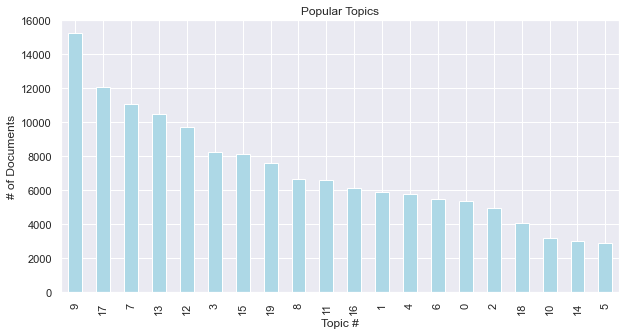

In [35]:
# Question 1
sns.set(rc={'figure.figsize':(10,5)})
document_topic.idxmax(axis=1).value_counts().plot.bar(xlabel="Topic #",
                                                      ylabel="# of Documents",
                                                      color='lightblue',
                                                      title="Popular Topics")

Topic 12 is the most popular topic at around 21000 documents containing this topic. A close runner up to topic 12 would be topic 8 which is the next most popular topic at about 17500 documents containing this topic. 


In [36]:
# Question 2
datedf = pd.DataFrame(docs['date'].unique())
datedf.rename(columns = {0:'date'}, inplace = True)
datedf['date'] = datedf['date'].str.split('/|-')
datedf = datedf[datedf['date'].notna()]
datedf.head()

C:\Users\VTX_3\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date
0,"[2016, 12, 31]"
1,"[2017, 06, 19]"
2,"[2017, 01, 06]"
3,"[2017, 04, 10]"
4,"[2017, 01, 02]"


In [37]:
ndates = []
for row in datedf.date:
    if row[0]=="2016" or row[0]=="2017":
        ndates.append(row)

C:\Users\VTX_3\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
df1617 = pd.DataFrame(ndates)
df1617 = df1617.astype(int)
df1617.rename(columns = {0:'year', 1:'month', 2:'day'}, inplace = True)
df1617.insert(3, "finaldate", pd.to_datetime(df1617[['year','month','day']]), True)
df1617.insert(4, "topic12", document_topic[12], True)
df1617.insert(5, "topic8", document_topic[8], True)
df1617.insert(6, "topic9", document_topic[9], True)
df1617.insert(7, "topic17", document_topic[17], True)
df1617 = df1617.sort_values(by='finaldate')
df1617 = df1617.drop_duplicates(subset=['finaldate'])
df1617.head()

C:\Users\VTX_3\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,year,month,day,finaldate,topic12,topic8,topic9,topic17
509,2016,1,1,2016-01-01,0.140423,0.000000,0.040738,0.033300
534,2016,1,2,2016-01-02,0.000000,0.000000,0.021435,0.076394
493,2016,1,3,2016-01-03,0.000000,0.000000,0.000000,0.000000
444,2016,1,4,2016-01-04,0.093580,0.027126,0.253688,0.041715
475,2016,1,5,2016-01-05,0.000000,0.327596,0.000000,0.068802


C:\Users\VTX_3\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-40-a642a4f3a196>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot()


Text(0, 0.5, 'Topic Evolution')

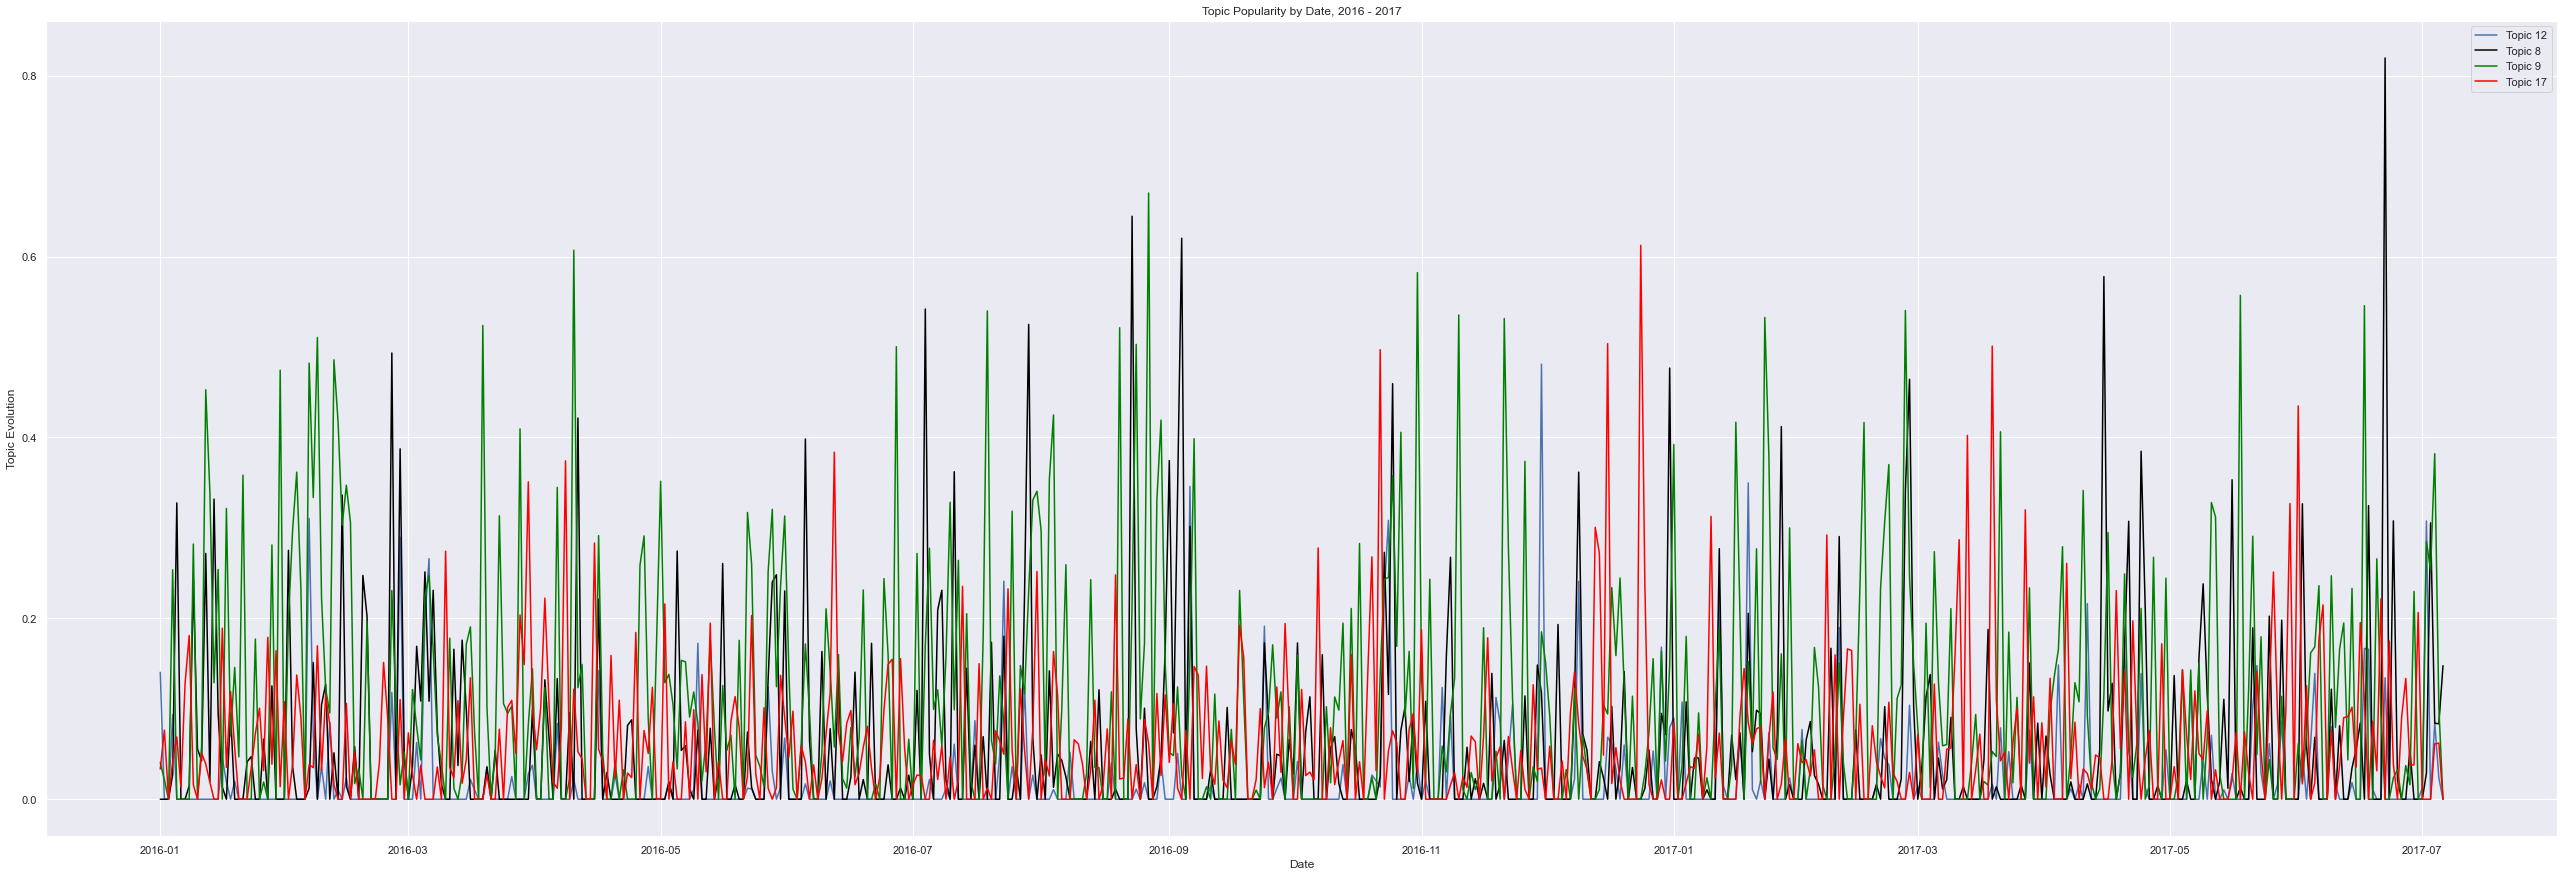

In [40]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(45,15))
plt.plot(df1617.finaldate, df1617.topic12, label='Topic 12')
plt.plot(df1617.finaldate, df1617.topic8, color='black', label='Topic 8')
plt.plot(df1617.finaldate, df1617.topic9, color='green', label='Topic 9')
plt.plot(df1617.finaldate, df1617.topic17, color='red', label='Topic 17')
ax = fig.add_subplot()
ax.legend()
plt.title('Topic Popularity by Date, 2016 - 2017')
plt.xlabel("Date")
plt.ylabel("Topic Evolution")

In [50]:
# Question 3
# Use Silhouette Scores or Elbow Curves to justify the number of topics in your project
# Explain what would be best number of topics in this dataset and why

from gensim.models.coherencemodel import CoherenceModel
def learn_lda_model(corpus, dictionary, k):
    newLDA = models.LdaModel(corpus, 
               id2word=dictionary, 
               num_topics=k, 
               random_state=37, 
               iterations=100,
               passes=5,
               per_word_topics=False)
    cm = CoherenceModel(model=newLDA, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    print('{}: {}'.format(k, coherence))
    return k, coherence

C:\Users\VTX_3\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
T = [t.split(' ') for t in docs]

dictionary = corpora.Dictionary(T)
corpus = [dictionary.doc2bow(text) for text in T]

lda_scores = [learn_lda_model(doc, dictionary_LDA, k) for k in range(2, 26)]

C:\Users\VTX_3\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2: -0.9669432073029354
3: -1.023019517509903
4: -1.1069788308013095
5: -1.120972862555692
6: -1.1999347850995827
7: -1.245652854905877
8: -1.4321867506197759
9: -1.402568279790157
10: -1.347433148575093
11: -1.4246495783599882
12: -1.3975002068540592
13: -1.5283922630138507
14: -1.5370502789550158
15: -1.4373933548485922
16: -1.453817242305031
17: -1.4931344865939675
18: -1.526198279110164
19: -1.5428634415775055
20: -1.496529010889135
21: -1.5548189780262232
22: -1.60641248031898
23: -1.6076358056764222
24: -1.6454828611022656
25: -1.6301575500654704


C:\Users\VTX_3\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


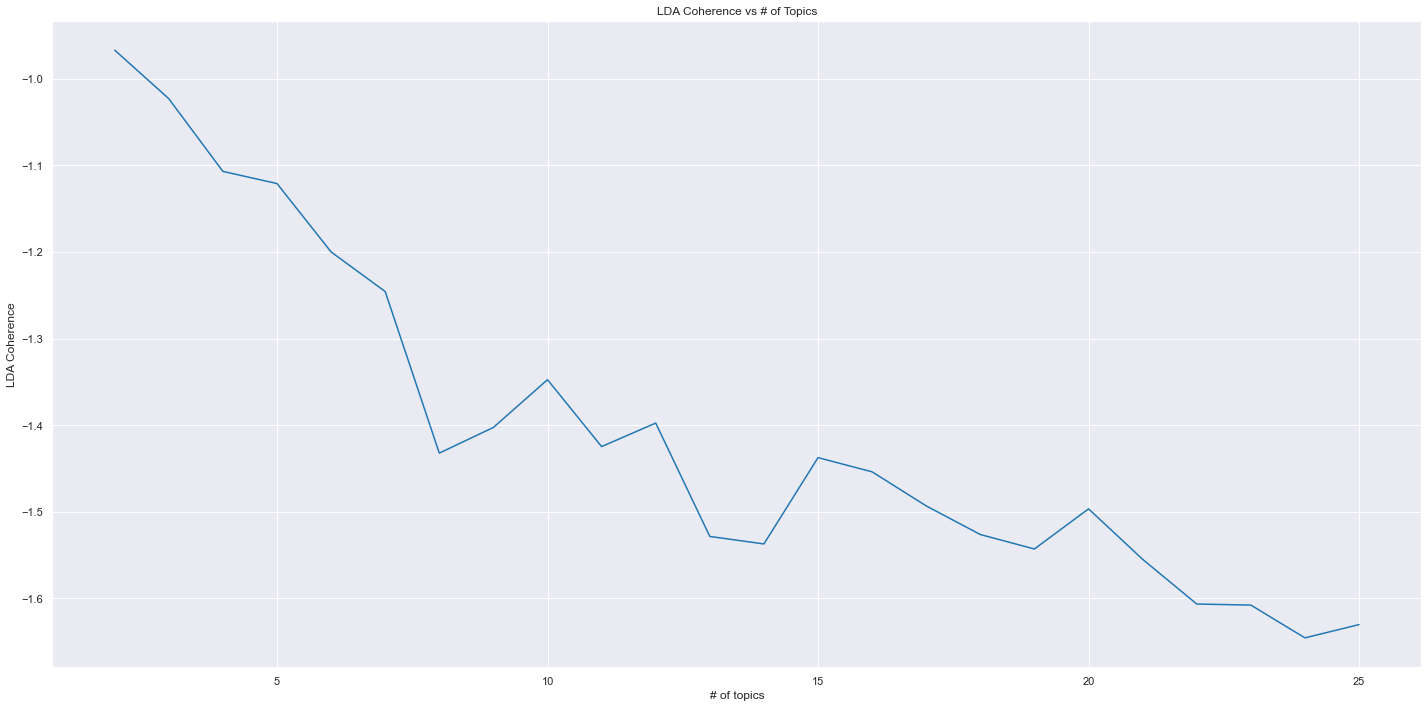

In [67]:
def plot_scores(scores, ylabel):
    _x = [s[0] for s in scores]
    _y = [s[1] for s in scores]
    plt.plot(_x, _y, color='tab:blue')
    plt.xlabel('# of topics')
    plt.ylabel(ylabel)
    #plt.ylim(-2, 0)
    plt.title('LDA Coherence vs # of Topics')
    
fig = plt.figure(figsize=(20,10))
#fig, ax = plt.subplots(1, 3, figsize=(15, 5))
plot_scores(lda_scores, 'LDA Coherence')
plt.tight_layout()

To obtain the optimal number of topics for this project, LDA topic modeling is used in conjunction with the coherence score value. When it comes to examining coherence score on the chart, higher is typically better. However, when factoring the use of elbow curves, the number of topics should also be in the range of which the chart begins to gradually become relatively level.

Therefore, the handout's instructions to use 20 topics makes sense then since this is the last point in which the LDA coherence value increases by a fair margin before decreasing at a linear rate. As a result, it is at 20 topics where the number of topics and the LDA coherence values are maximized.

However, despite the above, there still exist other good elbow points. The next two candidates for the best number of topics include 10 and 15 respectively. 10 would likely be the best number of topics for this dataset since this is the point where LDA coherence is greatest after the initial decrease of this chart. 15 would also be good since immediately after this increase there is a smooth linear decrease in coherence. 